In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [10]:
# Creiamo il layer di ingresso
inputs = keras.Input(shape=(784,))

# Primo layer denso con 64 unità
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

# secondo layer denso con 64 unità
x = layers.Dense(64, activation="relu")(x)

# Layer di output con attivazione lineare
outputs = layers.Dense(10)(x)

# Creiamo il modello
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [11]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


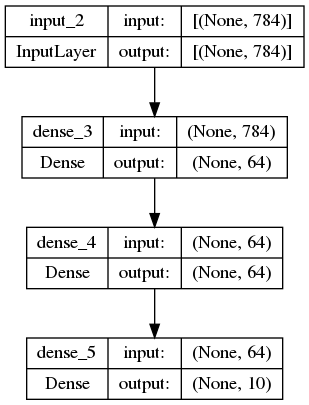

In [12]:
# Plot del grafo della rete
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


In [13]:
# creiamo il data set
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [14]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/20
750/750 [==============================] - 8s 9ms/step - loss: 0.3437 - accuracy: 0.9030 - val_loss: 0.1883 - val_accuracy: 0.9460
Epoch 2/20
750/750 [==============================] - 7s 9ms/step - loss: 0.1612 - accuracy: 0.9514 - val_loss: 0.1379 - val_accuracy: 0.9619
Epoch 3/20
678/750 [==========================>...] - ETA: 0s - loss: 0.1183 - accuracy: 0.9644

KeyboardInterrupt: 

In [ ]:
history.history

{'loss': [0.3407667279243469,
  0.16571097075939178,
  0.1242387518286705,
  0.09835740923881531,
  0.08183075487613678,
  0.07039597630500793,
  0.060767170041799545,
  0.05406194180250168,
  0.04784838855266571,
  0.04245085269212723,
  0.03682117164134979,
  0.03335260599851608,
  0.029683003202080727,
  0.02616242691874504,
  0.023343900218605995,
  0.020407317206263542,
  0.01878364384174347,
  0.016180969774723053,
  0.014619172550737858,
  0.01314716599881649],
 'accuracy': [0.9033958315849304,
  0.949916660785675,
  0.9632083177566528,
  0.9704791903495789,
  0.9751041531562805,
  0.9786041378974915,
  0.9820416569709778,
  0.9839583039283752,
  0.9856041669845581,
  0.9871875047683716,
  0.9882500171661377,
  0.9899583458900452,
  0.9906666874885559,
  0.9915624856948853,
  0.9928541779518127,
  0.9937291741371155,
  0.9938333630561829,
  0.9949166774749756,
  0.9952083230018616,
  0.9953749775886536],
 'val_loss': [0.1817559003829956,
  0.14196227490901947,
  0.12920473515987

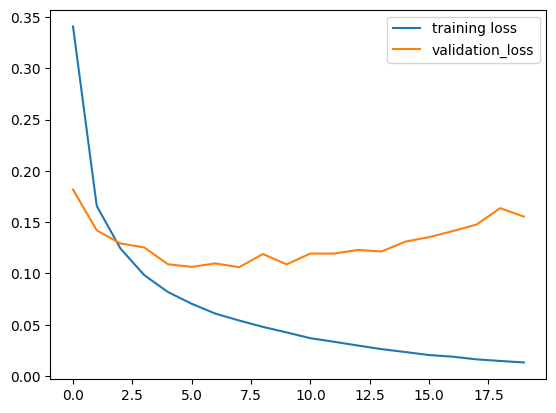

In [ ]:
epochs = np.arange(21)

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend(loc='upper right')
plt.show()

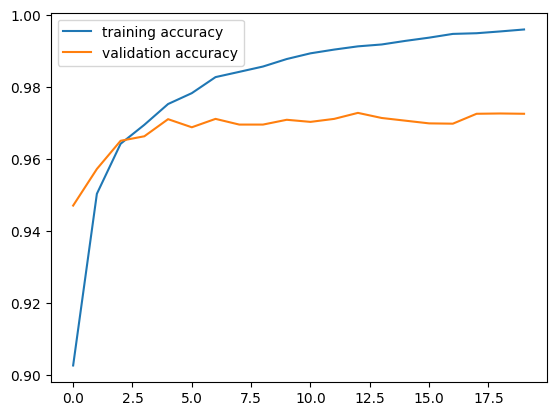

In [ ]:

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='upper left')
plt.show()